# Main Notes

- Seaborn is built on matplotlib

- sns.barplot(data = 'dataframe', x = 'x column', y = 'y column', ax = ax[0], hue = 'y column', palette = 'dark:b_r')

- _r reverses the color scheme

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
!pip install seaborn

In [4]:
import seaborn as sns

# Bar Chart Example

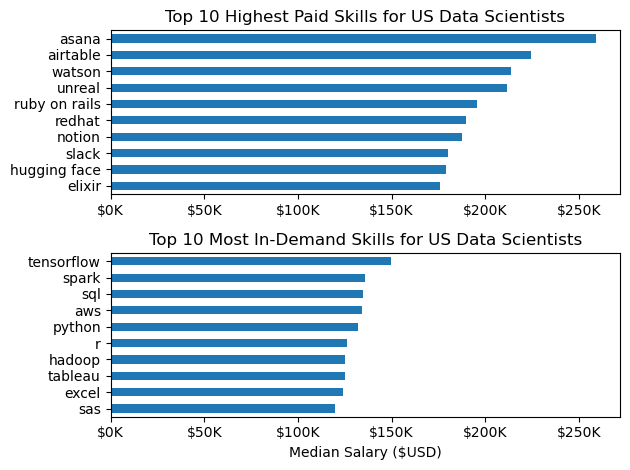

In [ ]:
# original code from 2.19 exercise
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_ds_us = df_ds_us.dropna(subset = ['salary_year_avg'])

df_ds_us = df_ds_us.explode('job_skills')

df_ds_us_grouped = df_ds_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_ds_top_pay = df_ds_us_grouped.sort_values(by = 'median', ascending = False).head(10)
df_ds_top_skills = df_ds_us_grouped.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

fig, ax = plt.subplots(2, 1)

df_ds_top_pay[::-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for US Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_ds_top_skills[::-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for US Data Scientists')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

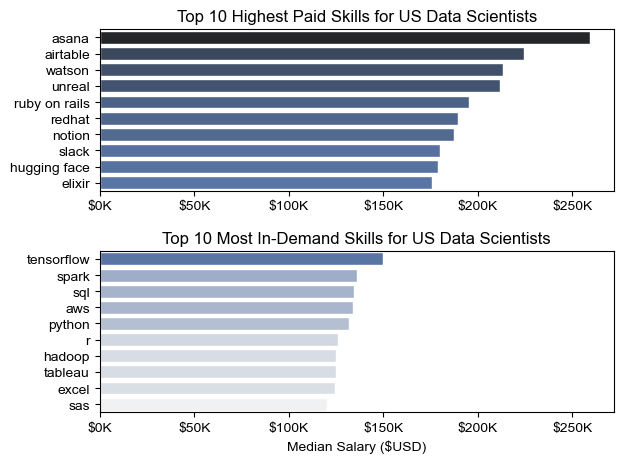

In [ ]:
# now let's edit it with seaborn
# only lines that are different are the lines containing the plot method

df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_ds_us = df_ds_us.dropna(subset = ['salary_year_avg'])

df_ds_us = df_ds_us.explode('job_skills')

df_ds_us_grouped = df_ds_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_ds_top_pay = df_ds_us_grouped.sort_values(by = 'median', ascending = False).head(10)
df_ds_top_skills = df_ds_us_grouped.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

fig, ax = plt.subplots(2, 1)

# can customize the theme too
sns.set_theme(style = "ticks")

sns.barplot(data = df_ds_top_pay, x = 'median', y = df_ds_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
#df_ds_top_pay[::-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for US Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


sns.barplot(data = df_ds_top_skills, x = 'median', y = df_ds_top_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
#df_ds_top_skills[::-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for US Data Scientists')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()

# Histogram Example

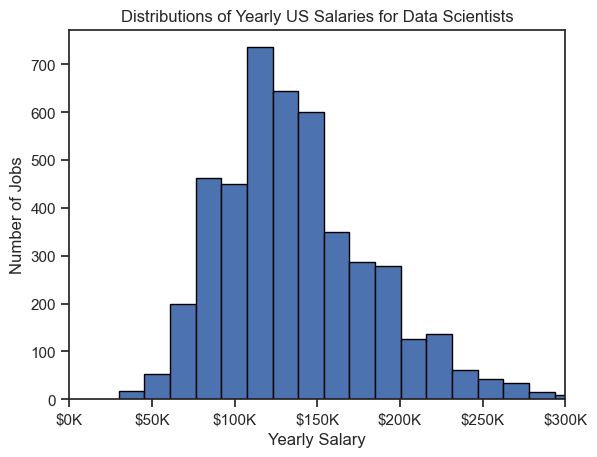

In [ ]:
# now customize a histogram in seaborn

# original code from lesson 2.17 Histograms
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_ds_us['salary_year_avg'].plot(kind = 'hist', bins = 60, edgecolor = 'black')
plt.xlim(0, 300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distributions of Yearly US Salaries for Data Scientists')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

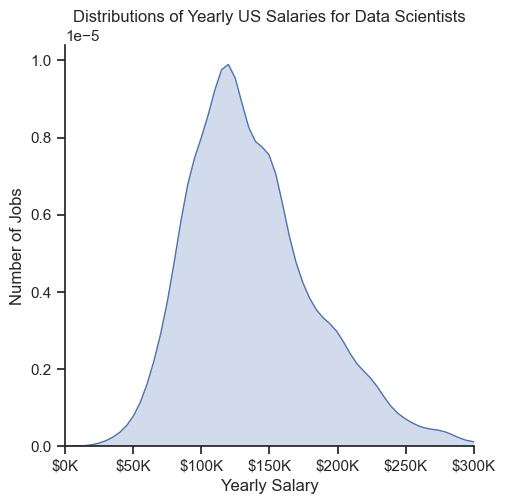

In [ ]:
# use the .displot() method

df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

sns.set_theme(style = "ticks")

# instead of the data keyword and putting in the dataframe, just use the column name
sns.displot(df_ds_us['salary_year_avg'], kind = 'kde', fill = True)
#df_ds_us['salary_year_avg'].plot(kind = 'hist', bins = 60, edgecolor = 'black')
plt.xlim(0, 300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distributions of Yearly US Salaries for Data Scientists')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

# Box Plot Example

C:\Users\jgribbl1\AppData\Local\Temp\ipykernel_22140\2651399086.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


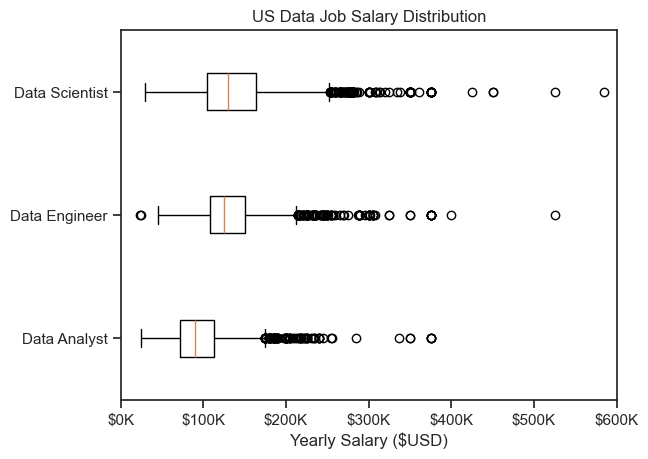

In [21]:
# original box plot code

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()

df_us['job_title_short'].value_counts()

df_us = df_us.dropna(subset = ['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('US Data Job Salary Distribution')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

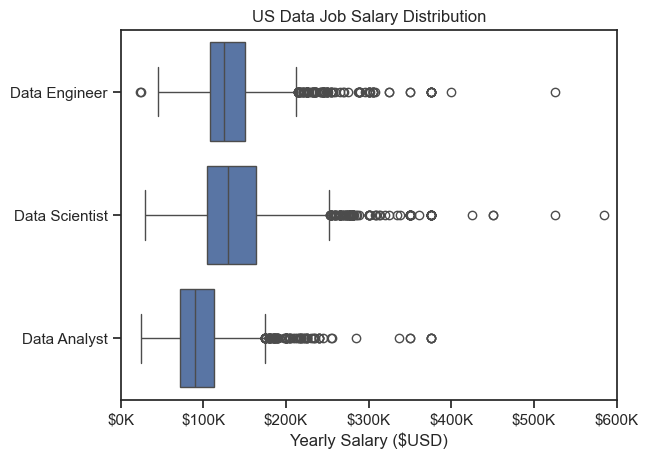

In [24]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()

df_us['job_title_short'].value_counts()

df_us = df_us.dropna(subset = ['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data = df_us, x = 'salary_year_avg', y = 'job_title_short')
# plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('US Data Job Salary Distribution')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Practice Problem 1

Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

Hint:
Use sns.barplot() to create the bar plot and sort the companies by median salary

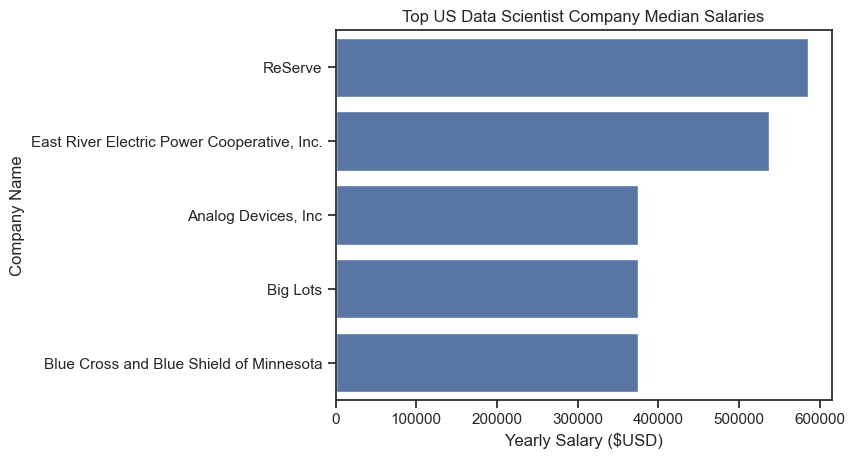

In [39]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_1 = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg']).copy()
df_companies = df_1.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data = df_companies, x = 'salary_year_avg', y = 'company_name')
plt.title('Top US Data Scientist Company Median Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Company Name')
plt.show()

# Practie Problem 2

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values

Use 25 bins for the histogram and set the x-axis limit to 700,000

Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'

Hint:
Use the sns.histplot() function to create the histogram and filter the DataFrame using boolean indexing

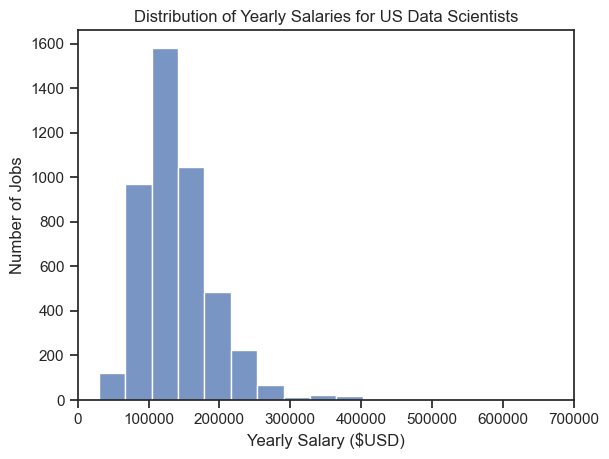

In [41]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_2 = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset = ['salary_year_avg']).copy()
sns.histplot(df_2['salary_year_avg'], bins = 25, kde = False)
plt.title('Distribution of Yearly Salaries for US Data Scientists')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 700000)
plt.show()

# Practice Problem 3

Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values

Set the x-axis limit to 300,000 and format it as $100k

Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'

Code Needed:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

Hint:
Use the sns.boxplot() function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using plt.FuncFormatter

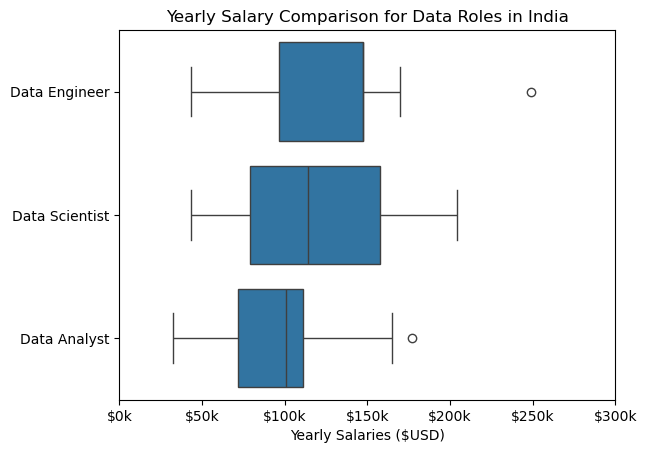

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_i = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_i = df_i.dropna(subset = ['salary_year_avg'])

sns.boxplot(data = df_i, x = 'salary_year_avg', y = 'job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salaries ($USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

# Practice Problem 4

Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States

Ensure the plot includes a title, axis labels, and custom formatting for the salary axis

Hint:

Use sns.violinplot() with the x parameter set to job_country and the y parameter set to salary_year_avg

Utilize plt.ylim() and plt.gca().yaxis.set_major_formatter() to set and format the salary axis

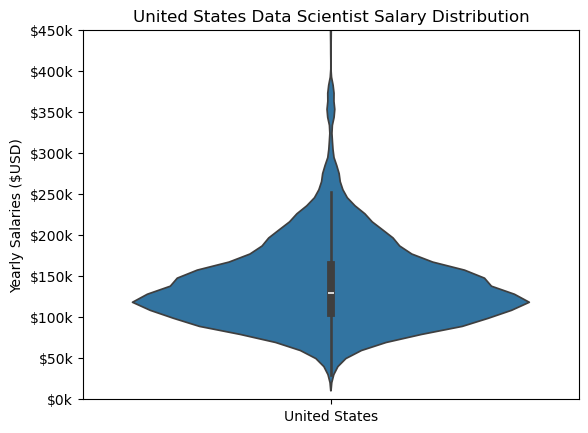

In [9]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_ds = df_ds.dropna(subset = ['salary_year_avg'])

sns.violinplot(data = df_ds, x = 'job_country', y = 'salary_year_avg')
plt.title('United States Data Scientist Salary Distribution')
plt.ylabel('Yearly Salaries ($USD)')
plt.xlabel('')
plt.ylim(0, 450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()